## Data science processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Info file
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
df = pd.read_csv('lending_club_loan_two.csv')

In [6]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [7]:
pd.set_option('display.max_columns', None)
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"


## Exploratory data analysis

Text(0.5, 1.0, 'Paid off and charged off loans')

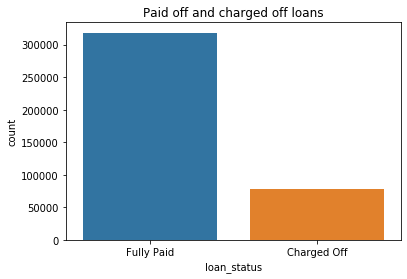

In [8]:
sns.countplot(x='loan_status',data=df)
plt.title('Paid off and charged off loans')

Text(0.5, 1.0, 'Distribution of loan amounts')

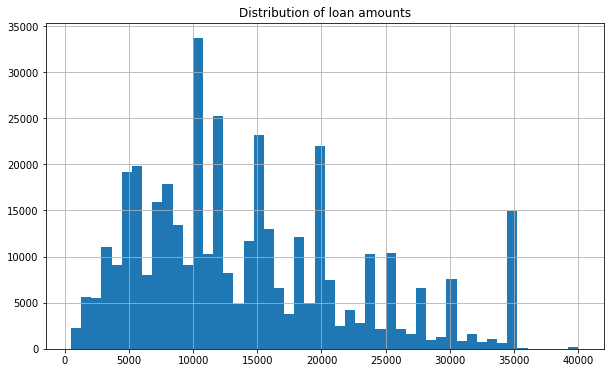

In [9]:
plt.figure(figsize=(10,6))
df['loan_amnt'].hist(bins=50)
plt.title('Distribution of loan amounts')

(10, 0)

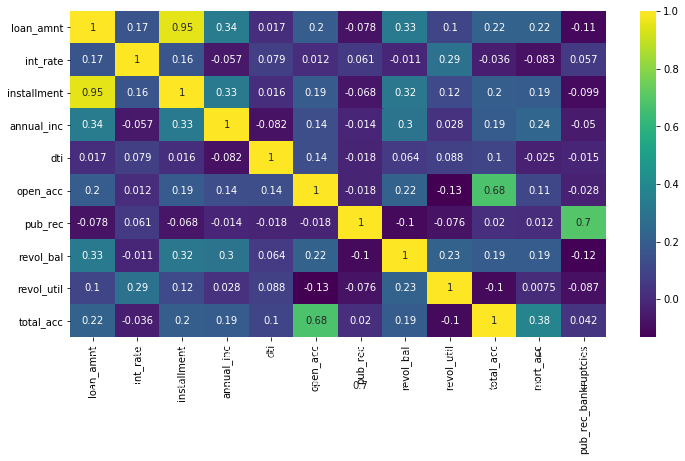

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.ylim(10, 0)

High correlation between loan amount and installment

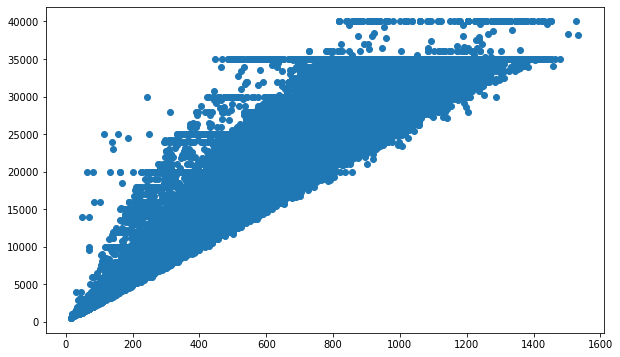

In [11]:
plt.figure(figsize=(10,6))
plt.scatter('installment', 'loan_amnt', data=df)

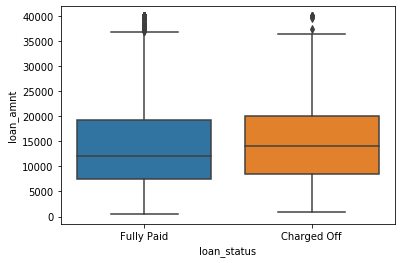

In [12]:
sns.boxplot('loan_status', 'loan_amnt', data=df)

In [13]:
# Numerical summary of boxplot
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### Grades and subgrades

In [14]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [15]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

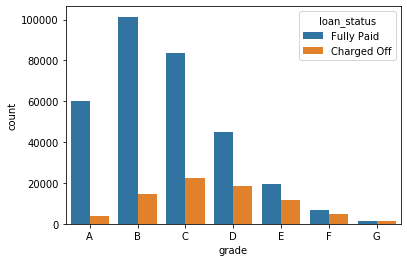

In [16]:
sns.countplot('grade', data=df, hue='loan_status', order=sorted(df['grade'].unique()))

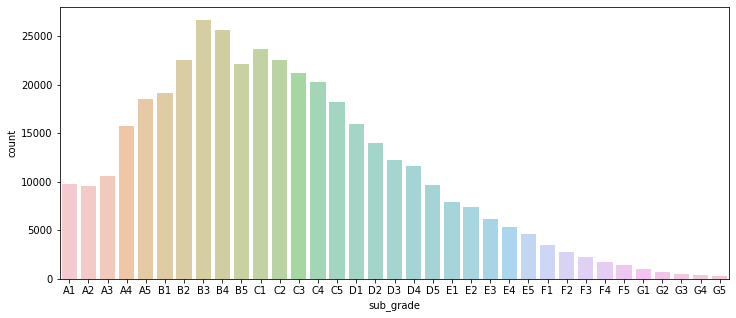

In [17]:
plt.figure(figsize=(12,5))
sns.countplot('sub_grade', data=df, order=np.sort(df['sub_grade'].unique()), alpha=0.5)

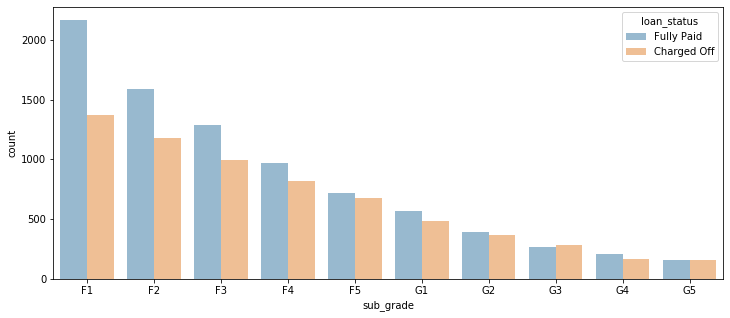

In [18]:
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(12,5))
sns.countplot('sub_grade', data=f_and_g, order=sorted(f_and_g['sub_grade'].unique()), hue='loan_status', alpha=0.5)

### Mapping label

In [19]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [20]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [21]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1


In [22]:
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


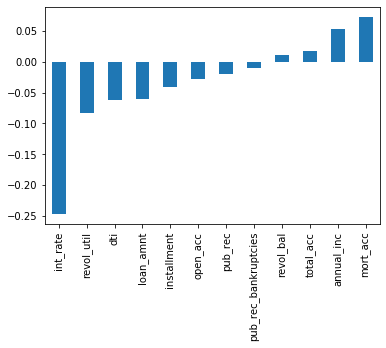

In [23]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

## Data preprocessing

Remove unnecessary and repetitive features

In [24]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1


In [25]:
len(df)

396030

In [26]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [27]:
print('NaN as a % of total dataframe')
df.isnull().sum()/len(df) * 100

NaN as a % of total dataframe


loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

### Employment

In [28]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [29]:
df['emp_title'].nunique()

173105

In [30]:
df['emp_title'].value_counts()

Teacher                       4389
Manager                       4250
Registered Nurse              1856
RN                            1846
Supervisor                    1830
                              ... 
Rocky Mountain Connections       1
Homeless Coordinator             1
express                          1
UPMC Health System               1
cdf corp                         1
Name: emp_title, Length: 173105, dtype: int64

Too many unique job titles to convert to a dummy variable feature. Therefore remove

In [31]:
df = df.drop('emp_title',axis=1)

In [32]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [33]:
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years',
                    '8 years', '9 years', '10+ years']

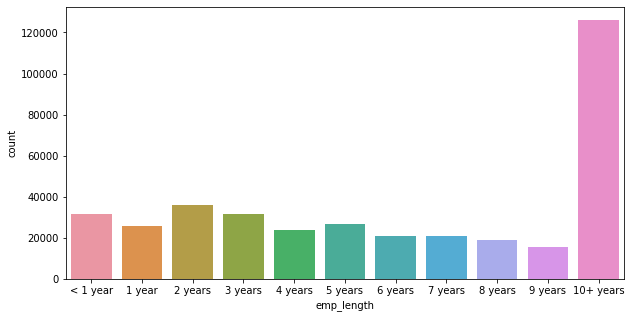

In [34]:
plt.figure(figsize=(10,5))
sns.countplot('emp_length', data=df, order=emp_length_order)

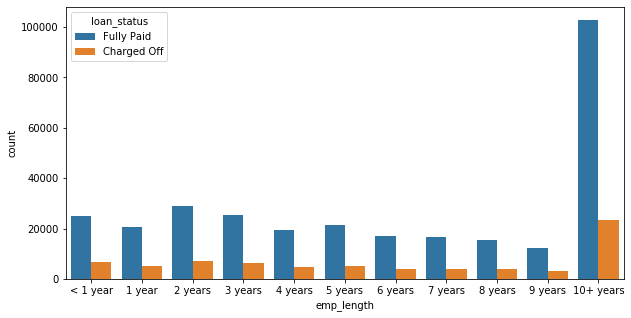

In [35]:
plt.figure(figsize=(10,5))
sns.countplot('emp_length', data=df, order=emp_length_order, hue='loan_status')

In [36]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length")['loan_status'].count()

In [37]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length")['loan_status'].count()

In [38]:
emp_ratio = emp_co/emp_fp

Text(0.5, 1.0, 'Ratio of charged off to fully paid loans by employment length')

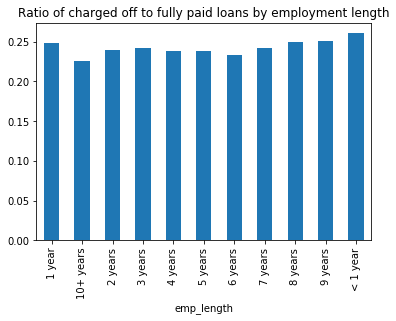

In [39]:
emp_ratio.plot(kind='bar')
plt.title('Ratio of charged off to fully paid loans by employment length')

Since the charge off rates are similar across employment length, we can drop this column too

In [40]:
df.drop('emp_length', axis=1, inplace=True)

### Check which columns still have missing data

In [41]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [42]:
df['purpose'].head(5)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [43]:
df['title'].head(5)
# Can drop title

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [44]:
df = df.drop('title',axis=1)

In [45]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

### Number of mortgage accounts

In [46]:
feat_info('mort_acc')

Number of mortgage accounts.


In [47]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

Could build a linear model, or fill in based on mean of other columns, or put into bins and set NaN as its own category

In [48]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [49]:
feat_info('total_acc')
# This feature correlates strongest with mortgage account

The total number of credit lines currently in the borrower's credit file


In [50]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [51]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [52]:
def fill_mort(mort_acc, total_acc):
    """
    Accepts mort_acc and total_acc. Checks if mort_acc is NaN, if so, returns average mort_acc for the corresponding
    total_acc value for that row
    """
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    
    else:
        return mort_acc

In [53]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['mort_acc'], x['total_acc']), axis=1)

In [54]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Revol_util and pub_rec_bankruptcies are less than 0.5% of the data, hence we can remove these rows

In [55]:
len(df)

396030

In [56]:
df = df.dropna()

In [57]:
len(df)

395219

In [58]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

All numericals values have now been dealt with

## Categorical and dummy variables

In [59]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### Term

In [60]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [61]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

### Grade

In [62]:
df = df.drop('grade',axis=1)

### Subgrade

In [63]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [64]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

### Home ownership

In [65]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [66]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

ownership_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.drop('home_ownership', axis=1)
df = pd.concat([df, ownership_dummies], axis=1)

### Verification status, initial list status, application type

In [67]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### Address

In [68]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### Issue date

In [69]:
feat_info('issue_d')

The month which the loan was funded


This would be data leakage, since we do not known whether or not a loan would be issued

In [70]:
df = df.drop('issue_d',axis=1)

### Earliest reported credit line

In [71]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [72]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [73]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [74]:
df = df.drop('loan_status',axis=1)

## Model training

In [75]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

Remember values for neural network

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalize data

Use minmaxscaler to normalize feature data X_train and Xtest. We don't want data leakage from the test set so only fit on the X_train data

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [79]:
X_train.shape

(316175, 78)

In [89]:
model = Sequential()

model.add(Dense(78,  activation='relu'))
# Same number of neurons as features
model.add(Dropout(0.2))
# To avoid overfitting, drop out inputs to a layer

model.add(Dense(39, activation='relu'))
# Half each layer
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')
# Binary classification

In [81]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 11s 35us/sample - loss: 0.2987 - val_loss: 0.2642
Epoch 2/25
316175/316175 [==============================] - 9s 27us/sample - loss: 0.2650 - val_loss: 0.2643
Epoch 3/25
316175/316175 [==============================] - 9s 27us/sample - loss: 0.2627 - val_loss: 0.2625
Epoch 4/25
316175/316175 [==============================] - 8s 25us/sample - loss: 0.2615 - val_loss: 0.2622
Epoch 5/25
316175/316175 [==============================] - 11s 33us/sample - loss: 0.2608 - val_loss: 0.2626
Epoch 6/25
316175/316175 [==============================] - 11s 34us/sample - loss: 0.2601 - val_loss: 0.2615
Epoch 7/25
316175/316175 [==============================] - 8s 24us/sample - loss: 0.2599 - val_loss: 0.2613
Epoch 8/25
316175/316175 [==============================] - 8s 25us/sample - loss: 0.2594 - val_loss: 0.2618
Epoch 9/25
316175/316175 [==============================] - 8s 26us/sample

Save the model

In [82]:
from tensorflow.keras.models import load_model
model.save('data_process.h5')

## Evaluation

In [83]:
losses = pd.DataFrame(model.history.history)

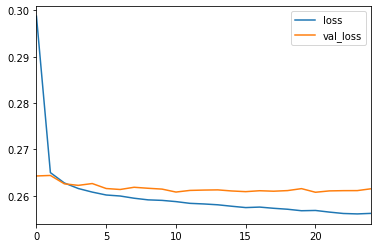

In [84]:
losses.plot()

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



array([[ 6941,  8717],
       [  195, 63191]], dtype=int64)

In [91]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [92]:
317696/len(df)

0.8038479931379817

Baseline is 80%, 89% accuracy is ok. Other metrics are more useful

### Example customer

In [86]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [87]:
model.predict_classes(scaler.transform(new_customer.values.reshape(1,-1)))

array([[1]])

Actual

In [88]:
df['loan_repaid'].iloc[random_ind]

1